# Rummikub Code Demo

## Dependencies

In [1]:
!pip install --quiet ultralytics==8.1.0

In [2]:
!rm -r /content/rummikub
!git clone https://github.com/jnsbhlr/rummikub

Cloning into 'rummikub'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 138 (delta 43), reused 56 (delta 23), pack-reused 60
Receiving objects: 100% (138/138), 42.72 MiB | 30.21 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [3]:
import sys
sys.path.append('/content/rummikub')

In [4]:
from google.colab.patches import cv2_imshow
from rummikub import Rummikub

## Instantiate Classes

In [5]:
rummikub = Rummikub()
vision = rummikub.vision
game = rummikub.game
player = game.add_player()

## Predict Demo Rack

Rack (13 Tiles):
[[BLACK_11], [BLACK_13], [BLUE_2], [BLUE_5], [BLUE_7], [BLUE_8], [BLUE_10], [ORANGE_5], [ORANGE_13], [RED_2], [RED_5], [RED_11], [RED_13]]



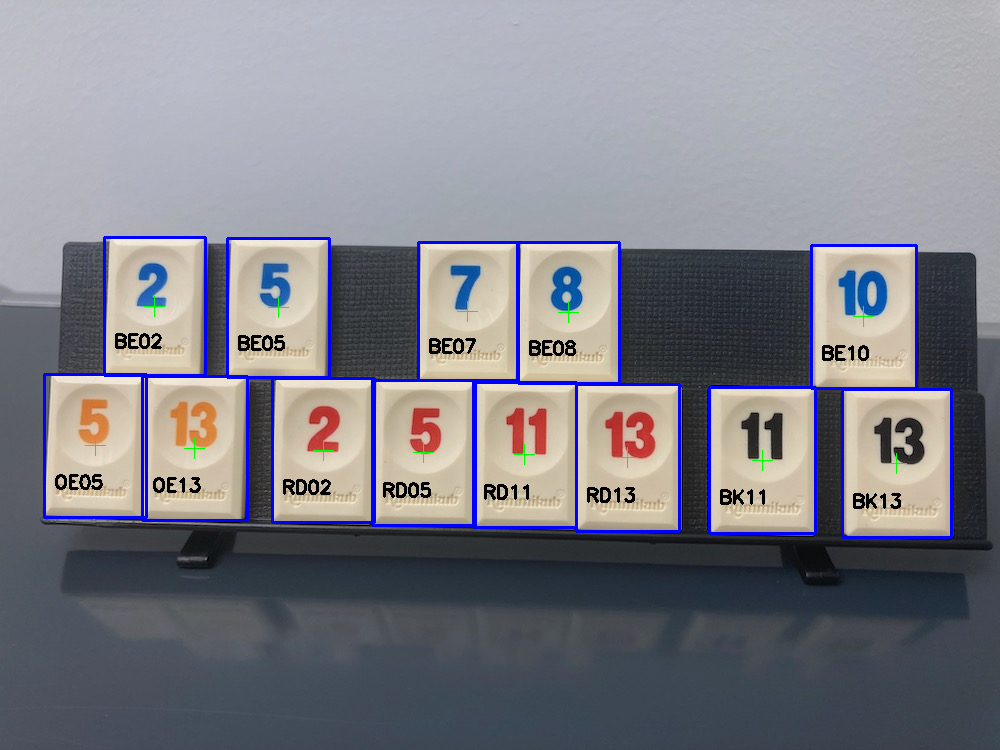

In [15]:
img_path = f"/content/rummikub/demo/demo-rack-1.jpeg"
rack = rummikub.rack_from_image(img_path, player)
print(rack)
print("")

result = vision.result

result.resetImg()

for box in result.boxes:
  box.drawBoundingBox(thickness=2)
  box.drawMarker()
  box.drawLabel()

cv2_imshow(result.img)

## Predict Demo Board

Board (4 Sets / 13 Tiles):
RUN[[BLUE_1], [BLUE_2], [BLUE_3]]
RUN[[ORANGE_5], [ORANGE_6], [ORANGE_7], [ORANGE_8]]
GROUP[[BLUE_9], [ORANGE_9], [RED_9]]
GROUP[[BLACK_7], [BLUE_7], [RED_7]]



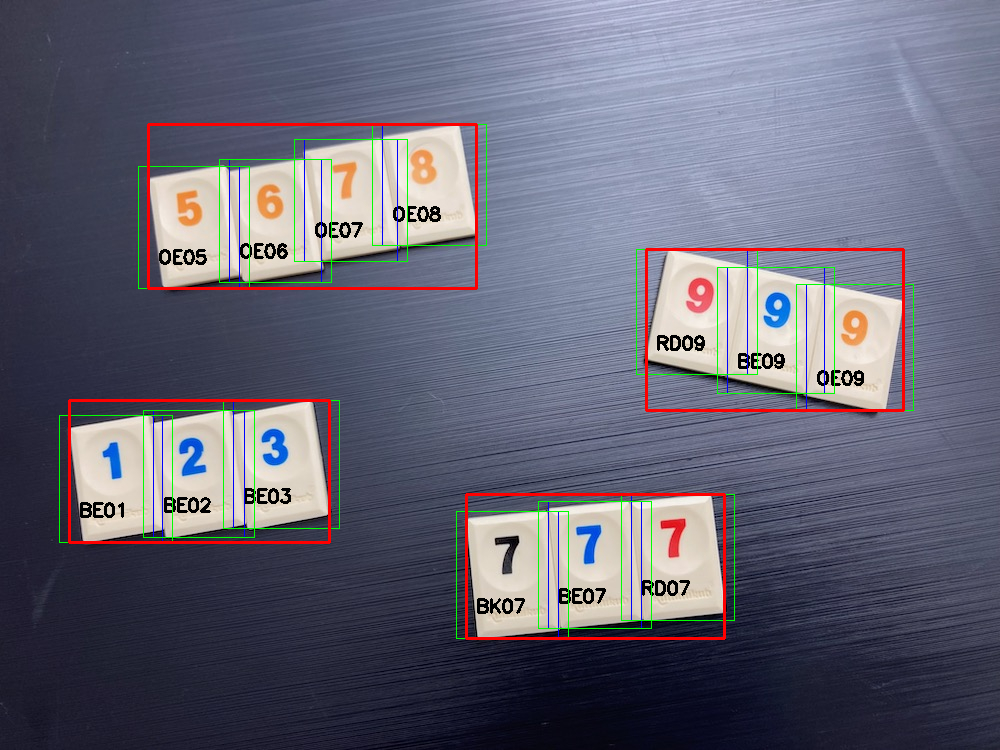

In [7]:
img_path = f"/content/rummikub/demo/demo-board-1.jpeg"
board = rummikub.board_from_image(img_path, game)
print(board)
print("")

result = vision.result

result.resetImg()
result.drawLabels()
result.drawBoundingBoxes()
result.drawBoundingBoxes(color=(0,255,0), margin=10)
result.drawBoundingBoxes(level='box_set', color=(0,0,255), thickness=2)
cv2_imshow(result.img)

In [8]:
print(game)

Rummikub Game
Deck (93): [[BLACK_1], [BLACK_1], [BLACK_2], [BLACK_2], [BLACK_3], [BLACK_3], [BLACK_4], [BLACK_5], [BLACK_6], [BLACK_6], [BLACK_7], [BLACK_7], [BLACK_8], [BLACK_8], [BLACK_9], [BLACK_10], [BLACK_10], [BLACK_11], [BLACK_12], [BLACK_12], [BLACK_13], [BLACK_13], [BLUE_1], [BLUE_1], [BLUE_2], [BLUE_2], [BLUE_3], [BLUE_4], [BLUE_4], [BLUE_5], [BLUE_6], [BLUE_6], [BLUE_7], [BLUE_7], [BLUE_8], [BLUE_8], [BLUE_9], [BLUE_10], [BLUE_10], [BLUE_11], [BLUE_11], [BLUE_12], [BLUE_12], [BLUE_13], [ORANGE_1], [ORANGE_1], [ORANGE_2], [ORANGE_2], [ORANGE_3], [ORANGE_3], [ORANGE_4], [ORANGE_4], [ORANGE_5], [ORANGE_5], [ORANGE_6], [ORANGE_6], [ORANGE_7], [ORANGE_7], [ORANGE_8], [ORANGE_8], [ORANGE_9], [ORANGE_9], [ORANGE_10], [ORANGE_11], [ORANGE_11], [ORANGE_12], [ORANGE_12], [ORANGE_13], [ORANGE_13], [RED_1], [RED_1], [RED_2], [RED_2], [RED_3], [RED_4], [RED_4], [RED_5], [RED_5], [RED_6], [RED_6], [RED_7], [RED_8], [RED_8], [RED_9], [RED_10], [RED_11], [RED_11], [RED_12], [RED_12], [RED_1

In [9]:
player.optimizer.print_solution()

Use the following tiles from your rack:
[BLACK_13], [BLUE_5], [ORANGE_5], [ORANGE_13], [RED_5], [RED_13]
To form the following sets on the board:
GROUP[[BLUE_5], [ORANGE_5], [RED_5]]
GROUP[[BLACK_13], [ORANGE_13], [RED_13]]


In [10]:
board = player.game.board
rack = player.rack

tile_set = board.add_tile_set(
  board.Group(tiles=[
    player.rack.search_tile('BLUE_5'),
    player.rack.search_tile('ORANGE_5'),
    player.rack.search_tile('RED_5')
  ])
)

for tile in tile_set.tiles:
  rack.remove_tile(tile)

tile_set = board.add_tile_set(
  board.Group(tiles=[
    player.rack.search_tile('BLACK_13'),
    player.rack.search_tile('ORANGE_13'),
    player.rack.search_tile('RED_13')
  ])
)

for tile in tile_set.tiles:
  rack.remove_tile(tile)

player.initial_play = False

print(player.game)

Rummikub Game
Deck (93): [[BLACK_1], [BLACK_1], [BLACK_2], [BLACK_2], [BLACK_3], [BLACK_3], [BLACK_4], [BLACK_5], [BLACK_6], [BLACK_6], [BLACK_7], [BLACK_7], [BLACK_8], [BLACK_8], [BLACK_9], [BLACK_10], [BLACK_10], [BLACK_11], [BLACK_12], [BLACK_12], [BLACK_13], [BLACK_13], [BLUE_1], [BLUE_1], [BLUE_2], [BLUE_2], [BLUE_3], [BLUE_4], [BLUE_4], [BLUE_5], [BLUE_6], [BLUE_6], [BLUE_7], [BLUE_7], [BLUE_8], [BLUE_8], [BLUE_9], [BLUE_10], [BLUE_10], [BLUE_11], [BLUE_11], [BLUE_12], [BLUE_12], [BLUE_13], [ORANGE_1], [ORANGE_1], [ORANGE_2], [ORANGE_2], [ORANGE_3], [ORANGE_3], [ORANGE_4], [ORANGE_4], [ORANGE_5], [ORANGE_5], [ORANGE_6], [ORANGE_6], [ORANGE_7], [ORANGE_7], [ORANGE_8], [ORANGE_8], [ORANGE_9], [ORANGE_9], [ORANGE_10], [ORANGE_11], [ORANGE_11], [ORANGE_12], [ORANGE_12], [ORANGE_13], [ORANGE_13], [RED_1], [RED_1], [RED_2], [RED_2], [RED_3], [RED_4], [RED_4], [RED_5], [RED_5], [RED_6], [RED_6], [RED_7], [RED_8], [RED_8], [RED_9], [RED_10], [RED_11], [RED_11], [RED_12], [RED_12], [RED_1

In [11]:
player.optimizer.print_solution()

No solution found.


In [12]:
tiles = player.draw_tile(count=5)

Tiles drawn:
[[RED_10], [BLACK_4], [BLUE_8], [BLUE_4], [RED_4]]


In [13]:
print(game)

Rummikub Game
Deck (88): [[BLACK_1], [BLACK_1], [BLACK_2], [BLACK_2], [BLACK_3], [BLACK_3], [BLACK_5], [BLACK_6], [BLACK_6], [BLACK_7], [BLACK_7], [BLACK_8], [BLACK_8], [BLACK_9], [BLACK_10], [BLACK_10], [BLACK_11], [BLACK_12], [BLACK_12], [BLACK_13], [BLACK_13], [BLUE_1], [BLUE_1], [BLUE_2], [BLUE_2], [BLUE_3], [BLUE_4], [BLUE_5], [BLUE_6], [BLUE_6], [BLUE_7], [BLUE_7], [BLUE_8], [BLUE_9], [BLUE_10], [BLUE_10], [BLUE_11], [BLUE_11], [BLUE_12], [BLUE_12], [BLUE_13], [ORANGE_1], [ORANGE_1], [ORANGE_2], [ORANGE_2], [ORANGE_3], [ORANGE_3], [ORANGE_4], [ORANGE_4], [ORANGE_5], [ORANGE_5], [ORANGE_6], [ORANGE_6], [ORANGE_7], [ORANGE_7], [ORANGE_8], [ORANGE_8], [ORANGE_9], [ORANGE_9], [ORANGE_10], [ORANGE_11], [ORANGE_11], [ORANGE_12], [ORANGE_12], [ORANGE_13], [ORANGE_13], [RED_1], [RED_1], [RED_2], [RED_2], [RED_3], [RED_4], [RED_5], [RED_5], [RED_6], [RED_6], [RED_7], [RED_8], [RED_8], [RED_9], [RED_11], [RED_11], [RED_12], [RED_12], [RED_13], [RED_13], [JOKER], [JOKER]]
Board (6 Sets / 19

In [14]:
player.optimizer.print_solution()

Use the following tiles from your rack:
[BLACK_4], [BLUE_4], [BLUE_7], [BLUE_8], [BLUE_10], [RED_4], [RED_10], [RED_11]
To form the following sets on the board:
GROUP[[BLACK_4], [BLUE_4], [RED_4]]
RUN[[ORANGE_5], [ORANGE_6], [ORANGE_7], [ORANGE_8], [ORANGE_9]]
GROUP[[BLUE_5], [ORANGE_5], [RED_5]]
GROUP[[BLACK_7], [BLUE_7], [RED_7]]
RUN[[RED_9], [RED_10], [RED_11]]
GROUP[[BLACK_13], [ORANGE_13], [RED_13]]
RUN[[BLUE_7], [BLUE_8], [BLUE_9], [BLUE_10]]
RUN[[BLUE_1], [BLUE_2], [BLUE_3]]
